In [183]:
import pandas as pd
import numpy as np

In [184]:
df=pd.read_csv('stroke.csv')

In [185]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [186]:
df=pd.get_dummies(df,drop_first=True)

In [187]:
from sklearn.model_selection import train_test_split
df.dropna(inplace=True)
df.drop('id',axis=1,inplace=True)
X=df.drop('stroke',axis=1)
y=df['stroke']

# X.dropna(inplace=True)


In [188]:
from sklearn.feature_selection import mutual_info_classif
mi_scores = mutual_info_classif(X, y)
mi = pd.Series(mi_scores, index=X.columns).sort_values(ascending=False)
print(mi)

age                               0.035757
heart_disease                     0.009699
hypertension                      0.006743
avg_glucose_level                 0.005305
Residence_type_Urban              0.004374
work_type_children                0.003700
ever_married_Yes                  0.003557
smoking_status_never smoked       0.002669
gender_Male                       0.002642
gender_Other                      0.001835
work_type_Never_worked            0.000905
work_type_Private                 0.000819
smoking_status_formerly smoked    0.000412
bmi                               0.000000
work_type_Self-employed           0.000000
smoking_status_smokes             0.000000
dtype: float64


In [189]:
X.drop(['smoking_status_smokes','smoking_status_formerly smoked','work_type_Self-employed','smoking_status_never smoked','Residence_type_Urban','work_type_Private','work_type_Never_worked','gender_Other'],axis=1,inplace=True)

In [190]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
model=LogisticRegression()

from imblearn.over_sampling import SMOTE

# Step 1: Split first
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [191]:
X_train[:10]

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Male,ever_married_Yes,work_type_children
1473,49.0,1,0,139.43,40.2,True,True,False
4539,63.0,0,0,203.87,26.4,False,True,False
953,6.0,0,0,92.98,18.9,True,False,True
2563,57.0,0,0,90.40,26.5,True,True,False
2426,7.0,0,0,79.58,15.5,False,False,True
187,82.0,1,1,215.94,27.9,False,True,False
1793,76.0,0,0,97.90,31.3,False,True,False
2441,65.0,0,0,84.47,52.7,False,True,False
594,63.0,1,0,105.95,23.5,False,True,False
4638,72.0,1,1,60.98,34.9,True,True,False


In [192]:
print("Before SMOTE:", y_train.value_counts())
# print("After SMOTE:", y_train_res.value_counts())
# Step 2: Apply SMOTE only on the training set
sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_train, y_train)
print("After SMOTE:", y_train.value_counts())


from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

model.fit(X_train,y_train)
y_pred=model.predict(X_test)


Before SMOTE: stroke
0    3760
1     167
Name: count, dtype: int64
After SMOTE: stroke
0    3760
1    3760
Name: count, dtype: int64


In [199]:
X_train[:10]

array([[-0.2915732 ,  2.95224699, -0.21355615,  0.33643311,  1.57280251,
         0.95933668,  0.47597645, -0.27535905],
       [ 0.34498704, -0.33872505, -0.21355615,  1.47354954, -0.46283889,
        -1.04238691,  0.47597645, -0.27535905],
       [-2.24672251, -0.33872505, -0.21355615, -0.48322949, -1.56916573,
         0.95933668, -2.10094428,  3.63162212],
       [ 0.07217551, -0.33872505, -0.21355615, -0.5287565 , -0.44808786,
         0.95933668,  0.47597645, -0.27535905],
       [-2.20125392, -0.33872505, -0.21355615, -0.71968759, -2.07070057,
        -1.04238691, -2.10094428,  3.63162212],
       [ 1.20889023,  2.95224699,  4.68260924,  1.68653829, -0.24157352,
        -1.04238691,  0.47597645, -0.27535905],
       [ 0.9360787 , -0.33872505, -0.21355615, -0.39641055,  0.25996132,
        -1.04238691,  0.47597645, -0.27535905],
       [ 0.43592422, -0.33872505, -0.21355615, -0.63339803,  3.41668058,
        -1.04238691,  0.47597645, -0.27535905],
       [ 0.34498704,  2.95224699

Accuracy: 0.7576374745417516
AUC: 0.680065856129686
0.7918882978723404


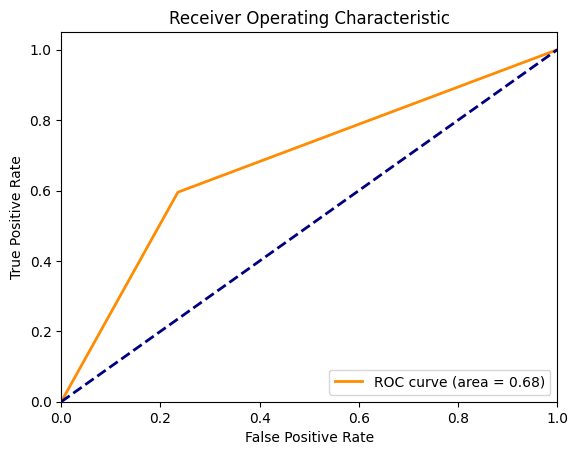

In [194]:
from sklearn.metrics import accuracy_score, auc, roc_curve

accuracy=accuracy_score(y_test,y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
print("Accuracy:", accuracy)
print("AUC:", roc_auc)

train_pred=model.predict(X_train)

print(accuracy_score(y_train,train_pred))

import matplotlib.pyplot as plt
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [195]:
print(sum(df['stroke']))
print(len(df['stroke']))

209
4909


In [196]:
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier(criterion='log_loss',random_state=42,max_features='log2')

dt.fit(X_train,y_train)
y_pred_dt=dt.predict(X_test)

accuracy=accuracy_score(y_test,y_pred_dt)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_dt)
roc_auc = auc(fpr, tpr)
print("Accuracy:", accuracy)
print("AUC:", roc_auc)

train_pred=dt.predict(X_train)

print(accuracy_score(y_train,train_pred))

Accuracy: 0.8584521384928717
AUC: 0.5621327254305978
1.0


In [197]:
tree = DecisionTreeClassifier(
    max_depth=5,           # limit depth
    min_samples_split=20,  # minimum samples per split
    min_samples_leaf=10,   # minimum samples per leaf
    class_weight='balanced',
    random_state=42
)

tree.fit(X_train, y_train)
y_pred_dt=tree.predict(X_test)

accuracy=accuracy_score(y_test,y_pred_dt)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_dt)
roc_auc = auc(fpr, tpr)
print("Accuracy:", accuracy)
print("AUC:", roc_auc)

train_pred=tree.predict(X_train)

print(accuracy_score(y_train,train_pred))


Accuracy: 0.7464358452138493
AUC: 0.6059777102330294
0.8361702127659575
